In [1]:
pip install pandas scikit-learn matplotlib



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
python.exe -m pip install --upgrade pip


SyntaxError: invalid syntax (1104305986.py, line 1)

In [3]:
pip install --upgrade pip

   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ----- ---------------------------------- 0.3/1.8 MB ? eta -:--:--
   ----- ---------------------------------- 0.3/1.8 MB ? eta -:--:--
   ----------- ---------------------------- 0.5/1.8 MB 541.6 kB/s eta 0:00:03
   ----------- ---------------------------- 0.5/1.8 MB 541.6 kB/s eta 0:00:03
   ----------------- ---------------------- 0.8/1.8 MB 633.2 kB/s eta 0:00:02
   ----------------- ---------------------- 0.8/1.8 MB 633.2 kB/s eta 0:00:02
   ---------------------- ----------------- 1.0/1.8 MB 671.0 kB/s eta 0:00:02
   ---------------------- ----------------- 1.0/1.8 MB 671.0 kB/s eta 0:00:02
   ---------------------------- ----------- 1.3/1.8 MB 639.0 kB/s eta 0:00:01
   ---------------------------- ----------- 1.3/1.8 MB 639.0 kB/s eta 0:00:01
   ---------------------------------- ----- 1.6/1.8 MB 621.5 kB/s eta 0:00:01
   -------------------

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv("C:/Users/Himanshi Sharma/Downloads/Ad_campaign/ad_campaign_data.csv")

print(df.columns)

x = df[["Impressions" , "Clicks" , "Signups" , "Spend"]]
y = df["Purchases"]

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)

model = LinearRegression()
model.fit(x_train, y_train)

Index(['Date', 'Channel', 'Impressions', 'Clicks', 'Signups', 'Purchases',
       'Spend'],
      dtype='object')


LinearRegression()

In [16]:
y_pred = model.predict(x_test)
print("MSE: " , mean_squared_error(y_test, y_pred))
print("R2 score: " , r2_score(y_test, y_pred))

df["Predicted Purchases"] = model.predict(x).round().astype(int)

df.to_csv("ad_campaign_data_with_predictions.csv" , index = False)
print("Updated file saved!")

MSE:  711.5272459824398
R2 score:  0.7076704279783576
Updated file saved!


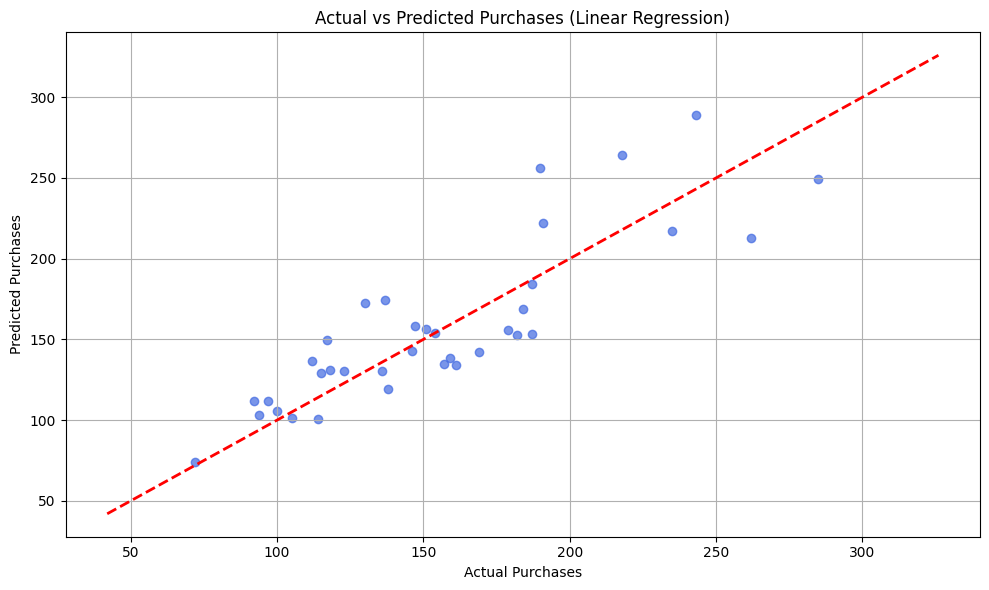

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='royalblue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel("Actual Purchases")
plt.ylabel("Predicted Purchases")
plt.title("Actual vs Predicted Purchases (Linear Regression)")
plt.grid(True)
plt.tight_layout()
plt.show()